# MNIST number classification
This is from the YT tutorial 
https://www.youtube.com/watch?v=aZsZrkIgan0

In [1]:
import os
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import random
%matplotlib inline

In [2]:
# Read the data in 
data = pd.read_csv('datasets/mnist/mnist_train.csv')

In [3]:
# Check the data
data.head() # As this is a pictures dataset, this mostly contains 0, 1 so this is not helpful here
# But at least we see that the first column is the number (label)
# This is the intensity for 28x28 pixels
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# Split the training data set
# Make it a 2D matrix first as it is an image
data = data.values

In [5]:
data.shape
# First is the number of images
# second is the number of total pixels: i.e. they are given as an array rather than as a 2D image 

(42000L, 785L)

In [6]:
# This is our training data
xtrain = data[0:21000,1:]
ytrain = data[0:21000,0]

In [7]:
# This is our testing data
xtest = data[21000:,1:]
ytest = data[21000:,0]

In [8]:
# First, we create an empty classifier 
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

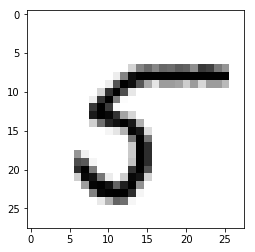

In [9]:
# Plotting one of the images
d = xtest[9]
d2 = np.reshape(d,(28,28))
d2.shape
plt.imshow(255-d2, cmap='gray')
plt.show()

In [10]:
# Now we want to get a prediction for the data
clf.predict([xtest[9]])

array([5], dtype=int64)

[2384, 17846, 7830, 4126, 14853, 1008, 12754, 5456, 17825]


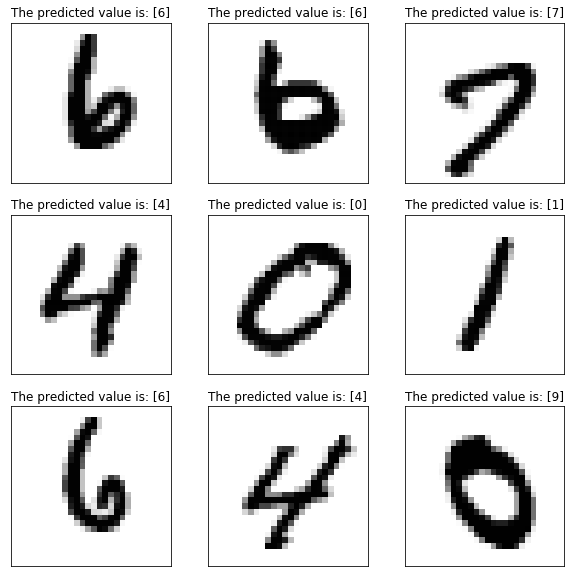

In [11]:
# Now have that all in the same plot
# here: choose which numbers to predict
idx = [1,2,3,4,5,6,7,8,9]

# or we can randomly create numbers to plot
store = []
for i in range(0,9):
    randelem = random.randint(1, xtest.shape[0])
    store.append(randelem)
print store
idx = store

plt.figure(figsize=(10,10));

for count, elem in enumerate(idx):
    test_image = xtest[elem]
    test_image = np.reshape(test_image,(28,28))
        
    plt.subplot(3,3,count+1),plt.imshow(255-test_image,'gray')
    plt.title('The predicted value is: '+str(clf.predict([xtest[elem]])))
    plt.xticks([]),plt.yticks([])
plt.show()



### Now we want to determine the accuracy of the classification 
Therefore, we give it the entire trainingset.
Here, we count the number of instances where the prediction is actually the real label 

In [12]:
predicted_test = clf.predict(xtest)

In [59]:
count = 0
for i in range(0, xtest.shape[0]):
    if predicted_test[i] == ytest[i]:
        count = count +1
count = float(count)
print "Accuracy (in percent of the whole dataset) is: ", (count/xtest.shape[0])*100, "%"

Accuracy (in percent of the whole dataset) is:  83.4476190476 %


In [60]:
# Now I want to see how well it trained with my training data 
predicted_train = clf.predict(xtrain)

In [61]:
count2 = 0
for i in range(0, xtrain.shape[0]):
    if predicted_train[i] == ytrain[i]:
        count2 = count2 +1
count2 = float(count2)
print "Accuracy (in percent of the whole dataset) is: ", (count2/xtrain.shape[0])*100, "%"

Accuracy (in percent of the whole dataset) is:  100.0 %


In [62]:
# This is what happens when we take only a subset of the training dataset 
xtrain_subset = xtrain[:5000]
ytrain_subset = ytrain[:5000]

In [63]:
predicted_subset = clf.predict(xtrain_subset)

In [64]:
count3 = 0
for i in range(0, xtrain_subset.shape[0]):
    if predicted_subset[i] == ytrain_subset[i]:
        count3 = count3 +1
count3 = float(count3)
print "Accuracy (in percent of the whole dataset) is: ", (count3/xtrain_subset.shape[0])*100, "%"

Accuracy (in percent of the whole dataset) is:  100.0 %


In [65]:
xAll = data[:,1:]
yAll = data[:,0]

In [66]:
predict_all = clf.predict(xAll)

In [67]:
count4 = 0
for i in range(0, xAll.shape[0]):
    if predict_all[i] == yAll[i]:
        count4 = count4 +1
count4 = float(count4)
print "Accuracy (in percent of the whole dataset) is: ", (count4/xAll.shape[0])*100, "%"

Accuracy (in percent of the whole dataset) is:  91.7238095238 %


### Summary: 
We get a 100% classification accuracy on the training dataset
However, when we test it on a completely new dataset that it has never seen before, we only get 83% accuracy.
When we take the whole dataset, i.e. the training and the test data set, then we get 91% accuracy. 
So we get the worst results on data that the algorithm hasnt seen before 